In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import nibabel
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.plotting import find_xyz_cut_coords
from glob import glob
from scipy.stats.stats import pearsonr
from nilearn.image import new_img_like
import matplotlib.pyplot as plt
from nilearn.image import mean_img

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
list_path = glob("/storage/workspace/hrichard/results/exp9/ibccompare*")
list_path += glob("/storage/workspace/hrichard/results/exp10/ibccompare*")
list_path = [list_path[0], list_path[1], list_path[3], list_path[4], list_path[5], list_path[6], list_path[7], list_path[8]]

hyperalignment
RH_1e6
ridgeCV_1500_2000_2500
mean
RRR_25_003
srm_pca
srm_ortho
srm_dict


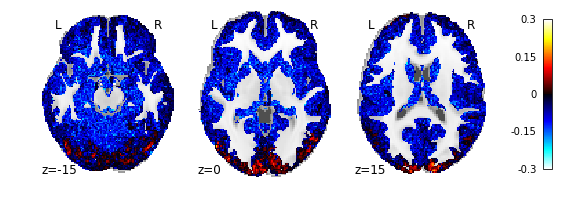

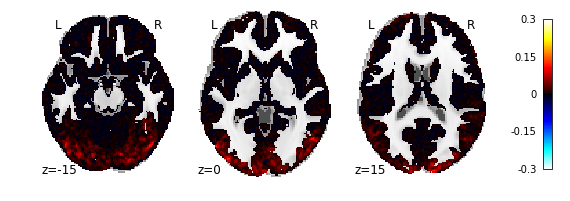

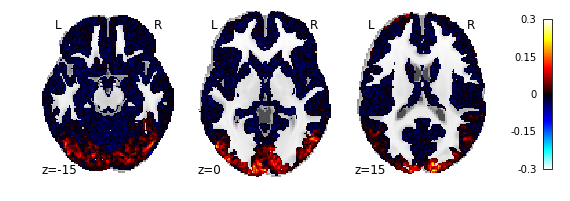

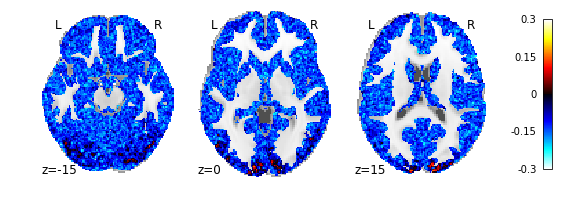

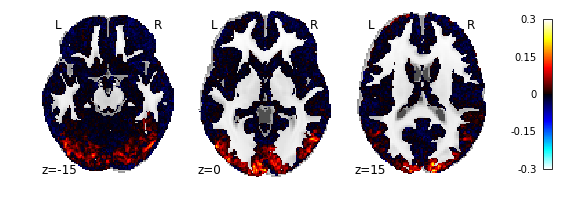

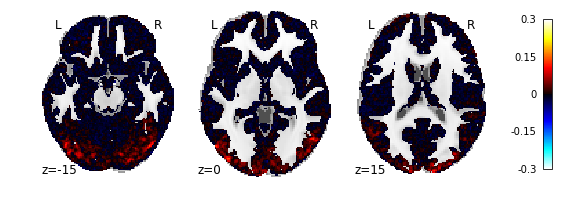

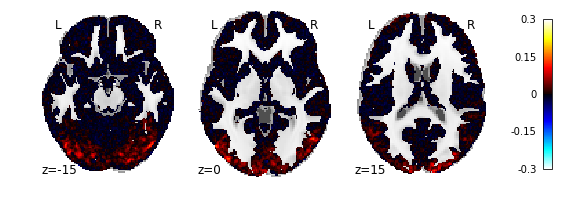

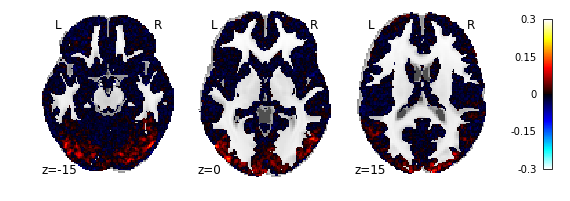

In [3]:
data_list = []
titles = []
for path in list_path:
    title = path.split("algo")[1].split("_exp")[0]
    titles.append(title)
    img = nibabel.load(path)
    print(title)
    plotting.plot_stat_map(img,
            cut_coords=[-15, 0, 15],
            display_mode="z",
            draw_cross=False,
            vmax=0.3,
            threshold=1e-5
            )
    X = img.get_data()
    data_list.append(X.flatten())
titles = ["scaled_ortho", "global_ridge", "local_ridge", "mean", "reduced_rank", "pca", "srm", "dict"]

['scaled_ortho', 'global_ridge', 'local_ridge', 'mean', 'reduced_rank', 'pca', 'srm', 'dict']


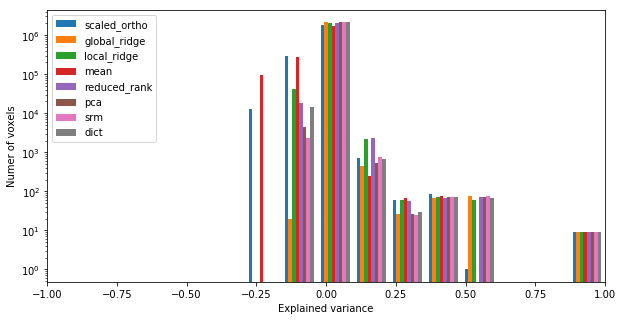

In [7]:
print(titles)

plt.figure(figsize=(10, 5))
plt.hist(np.stack(data_list, axis=1),label=titles)
plt.xlim(-1, 1)
plt.yscale("log")
plt.ylabel("Numer of voxels")
plt.xlabel("Explained variance")
plt.legend(loc="upper left")

['scaled_ortho', 'global_ridge', 'local_ridge', 'mean', 'reduced_rank', 'pca', 'srm', 'dict']
(1108800, 8)
(1108800, 8)
(1108800, 8)


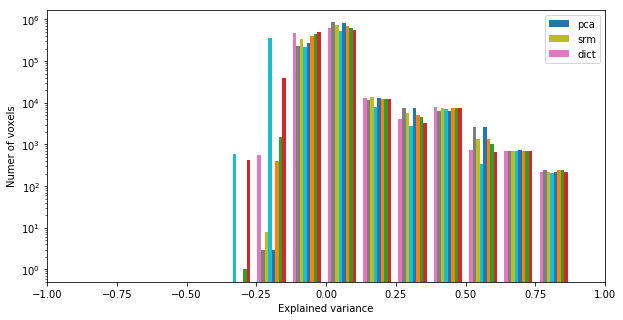

In [13]:
print(titles)

plt.figure(figsize=(10, 5))
for i in [5, 6, 7]:
    weights = np.array(data_list[i])
    weights[weights < 0] = 0
    print(np.stack(data_list, axis=1).shape)
    plt.hist(np.stack(data_list, axis=1),label=titles[i])
    plt.xlim(-1, 1)
    plt.yscale("log")
    plt.ylabel("Numer of voxels")
    plt.xlabel("Explained variance")
plt.legend()

(8, 2122945)


/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 8 x 2122945)
  '(shape is %d x %d)' % inp.shape[::-1])


KeyboardInterrupt: 

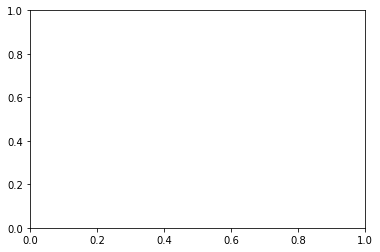

In [79]:
data = np.stack(data_list)
print(data.shape)
weights = data
weights[weights < 0.05] = 0
plt.hist(data, bins=10, weights=weights, histtype='stepfilled',cumulative=True, label=titles)
plt.xlim(-1, 0.99)
plt.yscale("symlog")
plt.ylabel("Number of voxels")
plt.xlabel("Explained variance")
plt.legend()

[ 0.06179957  0.05665933  0.05592136 ...,  0.06218639  0.05803743
  0.05180806]
[3118, 4088, 7141, 8044, 861, 8365, 3918, 5185, 4458]


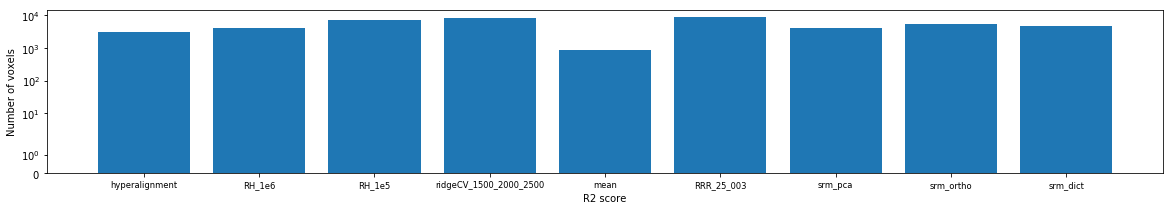

In [79]:
plt.figure(figsize=(20,3))
plot_data = []
for dat in data_list:
    plot_data.append(len(dat.tolist()))

print(np.array(dat.tolist()))
print(plot_data)
plt.bar(range(len(titles)), plot_data, data=titles)
plt.xlabel("R2 score")
plt.xticks(range(len(titles)), titles, size='small')
plt.ylabel("Number of voxels")
plt.yscale("symlog")
plt.legend()

In [8]:
list_path = glob("/storage/workspace/hrichard/results/exp9/forrestcompare*")
list_path += glob("/storage/workspace/hrichard/results/exp10/forrestcompare*")
list_path = [list_path[0], list_path[1], list_path[3], list_path[4], list_path[5], list_path[6], list_path[7], list_path[8]]

/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dictsubject_6_exp10.nii
/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dictsubject_1_exp10.nii
/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dictsubject_5_exp10.nii
/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dictsubject_2_exp10.nii
/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dictsubject_4_exp10.nii


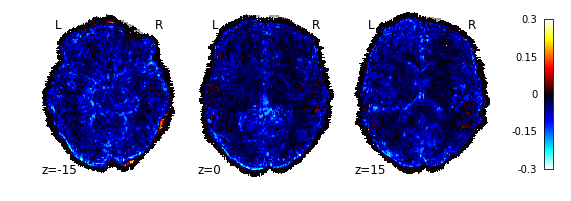

In [9]:
dict_img = mean_img(glob("/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dict*"))
for path in glob("/storage/workspace/hrichard/results/exp10/forrestalignment_srm_algosrm_dict*"): 
    print(path)
plotting.plot_stat_map(dict_img,
            cut_coords=[-15, 0, 15],
            display_mode="z",
            draw_cross=False,
            vmax=0.3,
            threshold=1e-5
            )

hyperalignment
RH_1e6
ridgeCV_1500_2000_2500
mean
RRR_25_003
srm_pca
srm_ortho
srm_dict


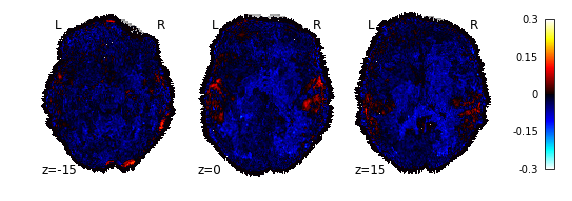

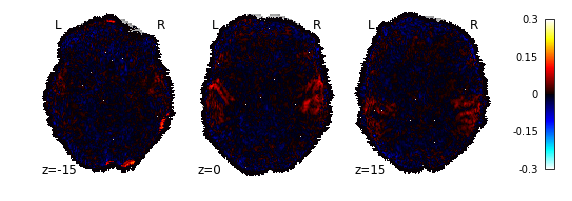

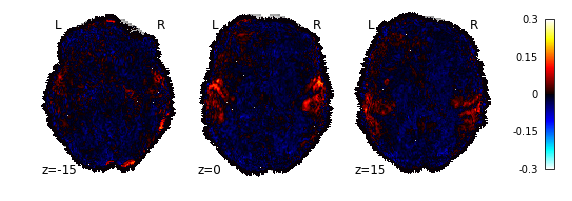

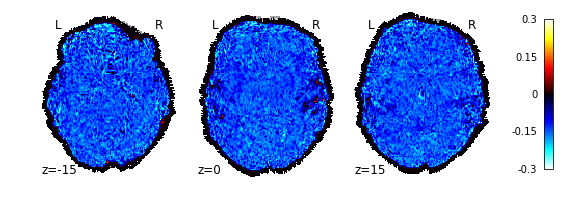

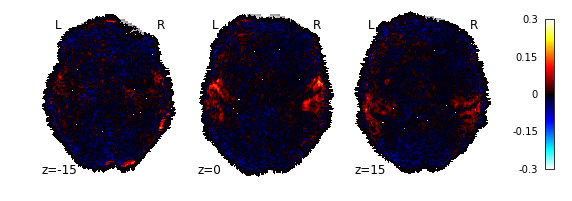

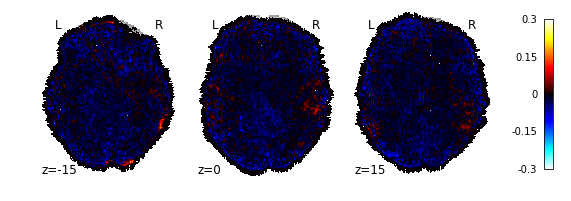

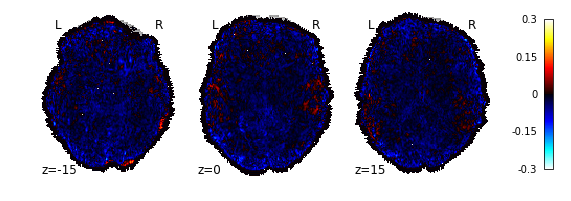

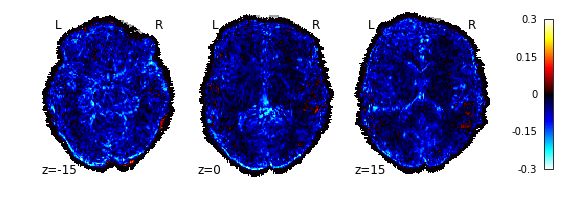

In [10]:
data_list = []
titles = []
for path in list_path:
    title = path.split("algo")[1].split("_exp")[0]
    titles.append(title)
    img = nibabel.load(path)
    print(title)
    plotting.plot_stat_map(img,
            cut_coords=[-15, 0, 15],
            display_mode="z",
            draw_cross=False,
            vmax=0.3,
            threshold=1e-5
            )
    X = img.get_data()
    data_list.append(X.flatten())
titles = ["scaled_ortho", "global_ridge", "local_ridge", "mean", "reduced_rank", "pca", "srm", "dict"]

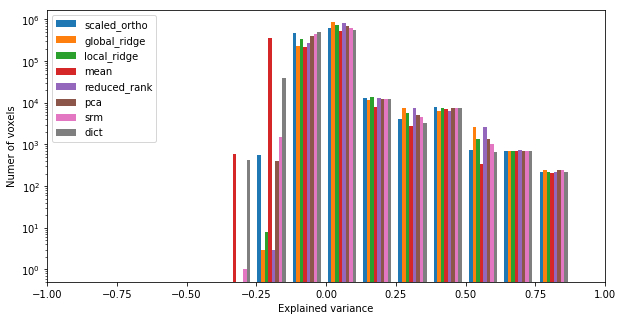

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(np.stack(data_list, axis=1),label=titles)
plt.xlim(-1, 1)
plt.yscale("log")
plt.ylabel("Numer of voxels")
plt.xlabel("Explained variance")
plt.legend(loc="upper left")

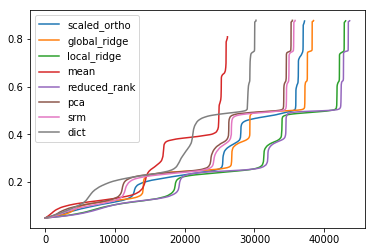

In [11]:
for i in range(len(data_list)):
    dat = data_list[i]
    plt.plot(sorted(dat), label=titles[i])
plt.legend()

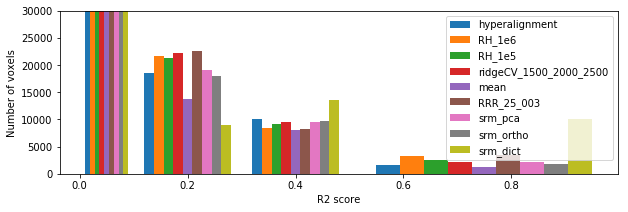

In [11]:
bins= [0, 0.1, 0.3, 0.5, 1]
plt.figure(figsize=(10,3))
plot_data = np.vstack(data_list).T
plt.hist(plot_data,bins=bins, label=titles)
plt.xlabel("R2 score")
plt.ylabel("Number of voxels")
plt.ylim([0, 30000])
plt.legend()